Feature matrix (X_train): (9599, 6)
Target matrix (y_train): (9599,)
Feature matrix (X_test): (2400, 6)
Target matrix (y_test): (2400,)
Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.001, 'max_iter': 500}
y_pred: (2400,)
Test MAE: 1.43


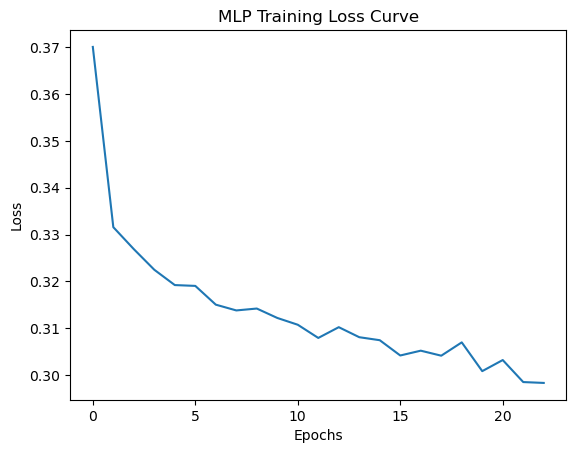

Feature matrix (X_train): (24183, 8)
Target matrix (y_train): (24183,)
Feature matrix (X_test): (6046, 8)
Target matrix (y_test): (6046,)
Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'max_iter': 500}
y_pred: (6046,)
Test MAE: 1.50


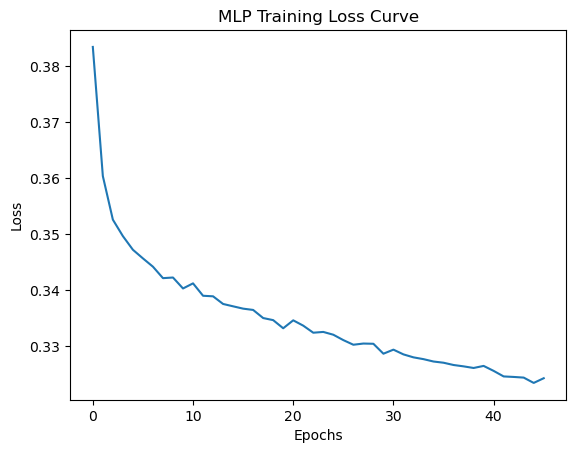

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

def load_data(filename):
    df = pd.read_csv(filename)
    df = df.select_dtypes(include=[np.number]).dropna()  # Ensure only numeric columns
    X = df.drop(columns=["Price"], errors="ignore")  # Features
    y = df["Price"] if "Price" in df.columns else df.iloc[:, -1]  # Target
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to normalize data
def normalize_data(X_train, X_test, y_train, y_test):
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Fit only on training data
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)  # Use the same scaler

    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()  # Use the same scaler

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y

def train_mlp(X_train, X_test, y_train, y_test, scaler_y, hidden_layers=(128, 64), max_iter=500):
    param_grid = {
        "hidden_layer_sizes": [(64, 32), (128, 64), (256, 128, 64)],
        "activation": ["relu", "tanh"],
        "learning_rate_init": [0.001, 0.01],
        "max_iter": [500]
    }
    
    mlp = MLPRegressor(solver="adam", random_state=42, early_stopping=True)
    
    grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters found: {grid_search.best_params_}")

    # Predict and inverse transform
    y_pred_scaled = best_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # Convert back

    # Evaluate model
    mae = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred.reshape(-1, 1))
    print(f"y_pred: {y_pred.shape}")
    print(f"Test MAE: {mae:.2f}")

    # Plot learning curve
    plt.plot(best_model.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("MLP Training Loss Curve")
    plt.show()
    
    return best_model

# Main function
def main():
    # Load the csv file in
    filename1="vietnam_housing_dataset.csv"
    X_train, X_test, y_train, y_test = load_data(filename1)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y = normalize_data(X_train, X_test, y_train, y_test)
    # Checking the shape of feature and target matrices
    print("Feature matrix (X_train):", X_train.shape)
    print("Target matrix (y_train):", y_train.shape)
    print("Feature matrix (X_test):", X_test.shape)
    print("Target matrix (y_test):", y_test.shape)
    # Train the MLP model using Scikit-Learn
    train_mlp(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, hidden_layers=(128, 64), max_iter=500)
    
    # Load the csv file in
    filename2="vietnam_housing_dataset_cleaned_data.csv"
    X_train, X_test, y_train, y_test = load_data(filename2)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y = normalize_data(X_train, X_test, y_train, y_test)
    # Checking the shape of feature and target matrices
    print("Feature matrix (X_train):", X_train.shape)
    print("Target matrix (y_train):", y_train.shape)
    print("Feature matrix (X_test):", X_test.shape)
    print("Target matrix (y_test):", y_test.shape)
    # Train the MLP model using Scikit-Learn
    train_mlp(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y, hidden_layers=(128, 64), max_iter=500)
    
# Run main function
if __name__ == "__main__":
    main()